<h2>An Introduction to Pandas in Python</h2>

Pandas is a software library written for the Python programming language. It is used for data manipulation and analysis. It provides special data structures and operations for the manipulation of numerical tables and time series.

Pandas is the name for a Python module, which is rounding up the capabilities of Numpy, Scipy and Matplotlab. The word pandas is an acronym which is derived from "Python and data analysis" and "panel data".

In [60]:
#pip install pandas
import pandas as pd

<h3>Data structures in pandas</h3>

<b>Dataframe and series</b>

<b>A DataFrame is a two-dimensional array of values with both a row and a column index.</b>

<b>A Series is a one-dimensional array of values with an index.</b>


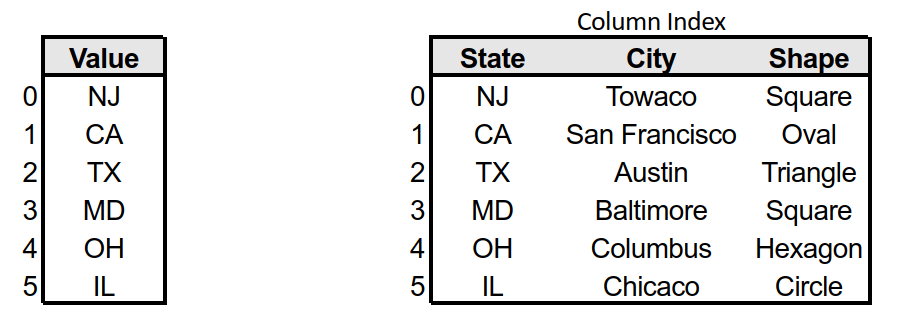

If it looks like the picture on the left is also present in the picture on the right, you’re right! Where a DataFrame is the entire dataset, including all rows and columns — a Series is essentially a single column within that DataFrame. 

<h3>Series</h3>

A Series is a one-dimensional labelled array-like object. It is capable of holding any data type, e.g. integers, floats, strings, Python objects, and so on. It can be seen as a data structure with two arrays: one functioning as the index, i.e. the labels, and the other one contains the actual data

In [8]:
import pandas as pd
S = pd.Series([11, 28, 72, 3, 5, 8])
print(S) 

0    11
1    28
2    72
3     3
4     5
5     8
dtype: int64


We haven't defined an index in our example, but we see two columns in our output: The right column contains our data, whereas the left column contains the index. Pandas created a default index starting with 0 going to 5, which is the length of the data minus 1.

In [9]:
print(S.index)
print(S.values)

RangeIndex(start=0, stop=6, step=1)
[11 28 72  3  5  8]


<b>Difference between Numpy array and Series</b>

There is often some confusion about whether Pandas is an alternative to Numpy, SciPy and Matplotlib. The truth is that it is built on top of Numpy. This means that Numpy is required by pandas. Scipy and Matplotlib on the other hand are not required by pandas but they are extremely useful. That's why the Pandas project lists them as "optional dependency".

In [10]:
import numpy as np
X = np.array([11, 28, 72, 3, 5, 8])
print(X)
print(S.values)
# both are the same type:
print(type(S.values), type(X))
print(type(S))

[11 28 72  3  5  8]
[11 28 72  3  5  8]
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [11]:
#What is the actual difference
fruits = ['apples', 'oranges', 'cherries', 'pears'] #We can define Series objects with individual indices(We can use arbitrary indices.)
quantities = [20, 33, 52, 10]
S = pd.Series(quantities, index=fruits)

In [12]:
print(S)

apples      20
oranges     33
cherries    52
pears       10
dtype: int64


In [13]:
#add two series with the same indices, we get a new series with the same index and the correponding values will be added
fruits = ['apples', 'oranges', 'cherries', 'pears']

S = pd.Series([20, 33, 52, 10], index=fruits)
S2 = pd.Series([17, 13, 31, 32], index=fruits)
print(S + S2)
print("sum of S: ", sum(S))


apples      37
oranges     46
cherries    83
pears       42
dtype: int64
sum of S:  115


In [14]:
#The indices do not have to be the same for the Series addition. The index will be the "union" of both indices. 
#If an index doesn't occur in both Series, the value for this Series will be NaN
fruits = ['peaches', 'oranges', 'cherries', 'pears']
fruits2 = ['raspberries', 'oranges', 'cherries', 'pears']

S = pd.Series([20, 33, 52, 10], index=fruits)
S2 = pd.Series([17, 13, 31, 32], index=fruits2)
print(S + S2)

cherries       83.0
oranges        46.0
peaches         NaN
pears          42.0
raspberries     NaN
dtype: float64


In [15]:
#indices can be completely different, as in the following example. 
#We have two indices. One is the Turkish translation of the English fruit names:
fruits = ['apples', 'oranges', 'cherries', 'pears','abc']

fruits_tr = ['elma', 'portakal', 'kiraz', 'armut']

S = pd.Series([20, 33, 52, 10,15], index=fruits)
S2 = pd.Series([17, 13, 31, 32], index=fruits_tr)
print(S + S2)

abc        NaN
apples     NaN
armut      NaN
cherries   NaN
elma       NaN
kiraz      NaN
oranges    NaN
pears      NaN
portakal   NaN
dtype: float64


<h3>Series indexing</h3>

In [16]:
a = [1,2,3,4]
a[0]

1

In [17]:
S

apples      20
oranges     33
cherries    52
pears       10
abc         15
dtype: int64

In [18]:
print('Single Indexing',S['apples'])
print('@@@@@@@@@@@@@@@@')
print('Multi Indexing ',S[['apples', 'oranges', 'mangoes']])

Single Indexing 20
@@@@@@@@@@@@@@@@
Multi Indexing  apples     20.0
oranges    33.0
mangoes     NaN
dtype: float64


C:\Users\dell\Documents\New folder\lib\site-packages\pandas\core\series.py:1152: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


<h3>pandas.Series.apply</h3>

The function "func" will be applied to the Series and it returns either a Series or a DataFrame, depending on "func".

Parameter	          Meaning
func	              a function, which can be a NumPy function that will be applied to the entire Series or a Python                                 function that will be applied to every single value of the series
convert_dtype	      A boolean value. If it is set to True (default), apply will try to find better dtype for elementwise                           function results. If False, leave as dtype=object
args	              Positional arguments which will be passed to the function "func" additionally to the values from the                           series.
**kwds	              Additional keyword arguments will be passed as keywords to the function

In [19]:
#Ex
print(S)
S.apply(np.log)
print(np.log(S))

apples      20
oranges     33
cherries    52
pears       10
abc         15
dtype: int64
apples      2.995732
oranges     3.496508
cherries    3.951244
pears       2.302585
abc         2.708050
dtype: float64


In [20]:
S

apples      20
oranges     33
cherries    52
pears       10
abc         15
dtype: int64

In [21]:
def fn:
    if x>50:
        do nothing
    else:
        x+10

SyntaxError: invalid syntax (<ipython-input-21-95f8fb61b7ba>, line 1)

In [22]:
# Let's assume, we have the following task. The test the amount of fruit for every kind. 
#If there are less than 50 available, we will augment the stock by 10:

S.apply(lambda x: x if x > 50 else x+10)

apples      30
oranges     43
cherries    52
pears       20
abc         25
dtype: int64

In [23]:
S

apples      20
oranges     33
cherries    52
pears       10
abc         15
dtype: int64

In [24]:
#Conditioning in a series
S[S>30]
# S>30

oranges     33
cherries    52
dtype: int64

In [25]:
"oranges" in S

True

In [26]:
#Creating Series Objects from Dictionaries
cities = {"London":    8615246, 
          "Berlin":    3562166, 
          "Madrid":    3165235, 
          "Rome":      2874038, 
          "Paris":     2273305, 
          "Vienna":    1805681, 
          "Bucharest": 1803425, 
          "Hamburg":   1760433,
          "Budapest":  1754000,
          "Warsaw":    1740119,
          "Barcelona": 1602386,
          "Munich":    1493900,
          "Milan":     1350680}

city_series = pd.Series(cities)
print(city_series)

London       8615246
Berlin       3562166
Madrid       3165235
Rome         2874038
Paris        2273305
Vienna       1805681
Bucharest    1803425
Hamburg      1760433
Budapest     1754000
Warsaw       1740119
Barcelona    1602386
Munich       1493900
Milan        1350680
dtype: int64


<h3>Handling missing data in pandas</h3>

One problem in dealing with data analysis tasks consists in missing data. Pandas makes it as easy as possible to work with missing data.



In [27]:
my_cities = ["London", "Paris", "Zurich", "Berlin", 
             "Stuttgart", "Hamburg"]

my_city_series = pd.Series(cities, 
                           index=my_cities)
my_city_series

London       8615246.0
Paris        2273305.0
Zurich             NaN
Berlin       3562166.0
Stuttgart          NaN
Hamburg      1760433.0
dtype: float64

Due to the Nan values the population values for the other cities are turned into floats. There is no missing data in the 9following examples, so the values are int:



In [28]:
my_cities = ["London", "Paris", "Berlin", "Hamburg"]

my_city_series = pd.Series(cities, 
                           index=my_cities)
my_city_series

London     8615246
Paris      2273305
Berlin     3562166
Hamburg    1760433
dtype: int64

In [29]:
#Finding whether a data is null or not
my_cities = ["London", "Paris", "Zurich", "Berlin", 
             "Stuttgart", "Hamburg"]

my_city_series = pd.Series(cities, 
                           index=my_cities)
print(my_city_series)#.isnull())

London       8615246.0
Paris        2273305.0
Zurich             NaN
Berlin       3562166.0
Stuttgart          NaN
Hamburg      1760433.0
dtype: float64


In [30]:
print(my_city_series.isnull())
my_city_series.notnull().sum()
my_city_series.isnull().sum()

London       False
Paris        False
Zurich        True
Berlin       False
Stuttgart     True
Hamburg      False
dtype: bool


2

In [31]:
#Drop the nulls
print(my_city_series.dropna())

London     8615246.0
Paris      2273305.0
Berlin     3562166.0
Hamburg    1760433.0
dtype: float64


In [32]:
#Fill the nulls
print(my_city_series.fillna(10200))

London       8615246.0
Paris        2273305.0
Zurich         10200.0
Berlin       3562166.0
Stuttgart      10200.0
Hamburg      1760433.0
dtype: float64


In [33]:
missing_cities = {"Stuttgart":597939, "Zurich":378884}
my_city_series.fillna(missing_cities)

London       8615246.0
Paris        2273305.0
Zurich        378884.0
Berlin       3562166.0
Stuttgart     597939.0
Hamburg      1760433.0
dtype: float64

In [34]:
my_city_series

London       8615246.0
Paris        2273305.0
Zurich             NaN
Berlin       3562166.0
Stuttgart          NaN
Hamburg      1760433.0
dtype: float64

In [35]:
#Still the values are not integers, we can convert it into int
my_city_series = my_city_series.fillna(0).astype(int)
print(my_city_series)

London       8615246
Paris        2273305
Zurich             0
Berlin       3562166
Stuttgart          0
Hamburg      1760433
dtype: int32


In [36]:
ser1 = pd.Series(['a','b','c'])
ser1

0    a
1    b
2    c
dtype: object

In [37]:
ser1= ser1.map({'a':1,'b':2,'c':3})
ser1

0    1
1    2
2    3
dtype: int64

In [38]:
ser1.index = ser1.index.map({0:2,1:4,2:6})

In [39]:
ser1

2    1
4    2
6    3
dtype: int64